In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('automobile.csv')
df.head()

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [3]:
df.replace('?',np.nan,inplace=True)

In [4]:
df.isna().sum()

3               0
?              40
alfa-romero     0
gas             0
std             0
two             2
convertible     0
rwd             0
front           0
88.60           0
168.80          0
64.10           0
48.80           0
2548            0
dohc            0
four            0
130             0
mpfi            0
3.47            4
2.68            4
9.00            0
111             2
5000            2
21              0
27              0
13495           4
dtype: int64

In [5]:
df.columns=['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [7]:
df['normalized-losses']=df['normalized-losses'].astype(float)
df['bore']=df['bore'].astype(float)
df['stroke']=df['stroke'].astype(float)
df['horsepower']=df['horsepower'].astype(float)
df['peak-rpm']=df['peak-rpm'].astype(float)
df['price']=df['price'].astype(float)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          204 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               204 non-null    object 
 3   fuel-type          204 non-null    object 
 4   aspiration         204 non-null    object 
 5   num-of-doors       202 non-null    object 
 6   body-style         204 non-null    object 
 7   drive-wheels       204 non-null    object 
 8   engine-location    204 non-null    object 
 9   wheel-base         204 non-null    float64
 10  length             204 non-null    float64
 11  width              204 non-null    float64
 12  height             204 non-null    float64
 13  curb-weight        204 non-null    int64  
 14  engine-type        204 non-null    object 
 15  num-of-cylinders   204 non-null    object 
 16  engine-size        204 non

In [9]:
df['normalized-losses'].replace(np.nan,df['normalized-losses'].mean(),inplace=True)
df['bore'].replace(np.nan,df['bore'].mean(),inplace=True)
df['stroke'].replace(np.nan,df['stroke'].mean(),inplace=True)
df['horsepower'].replace(np.nan,df['horsepower'].mean(),inplace=True)
df['peak-rpm'].replace(np.nan,df['peak-rpm'].mean(),inplace=True)
df['price'].replace(np.nan,df['price'].mean(),inplace=True)

In [10]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [12]:
df.dropna(subset=['num-of-doors'],inplace=True)

In [13]:
df.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [14]:
columns=['make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']
df[columns]=df[columns].astype(str)
df1=pd.get_dummies(df)
df1

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
2,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
3,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,122.0,99.8,177.3,66.3,53.1,2507,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
200,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,0,0,0,0,0,0,0,1,0,0
201,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,0,0,0,0,0,0,0,1,0,0
202,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,0,0,0,0,0,1,0,0,0,0


In [15]:
x=df1.drop(columns='price')
y=df1['price']

In [16]:
x.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_twelve,num-of-cylinders_two,fuel-system_1bbl,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
symboling,1.000000,0.469446,-0.526057,-0.356981,-0.227072,-0.533326,-0.230077,-0.107392,-0.134789,0.008578,...,-0.047001,0.248972,-0.036823,-0.030324,0.215074,-0.187374,0.123554,-0.000476,0.184872,0.066702
normalized-losses,0.469446,1.000000,-0.053651,0.024871,0.088709,-0.371866,0.100922,0.114135,-0.024987,0.053967,...,0.000286,0.125785,-0.132874,-0.145951,0.108659,-0.102739,0.051326,0.197607,0.065040,0.000286
wheel-base,-0.526057,-0.053651,1.000000,0.877666,0.794443,0.581357,0.781251,0.572796,0.494705,0.150052,...,0.037257,-0.083688,-0.195859,-0.410172,-0.072293,0.314396,-0.034475,0.368551,-0.121147,-0.033299
length,-0.356981,0.024871,0.877666,1.000000,0.840370,0.487179,0.879084,0.683458,0.605299,0.129667,...,0.100428,-0.059230,-0.300777,-0.496637,-0.051166,0.211409,-0.005374,0.529175,-0.081818,-0.008805
width,-0.227072,0.088709,0.794443,0.840370,1.000000,0.268950,0.868770,0.736626,0.560191,0.179209,...,0.153649,-0.014850,-0.196844,-0.532068,-0.012828,0.233385,0.012347,0.478712,-0.048272,-0.023800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fuel-system_idi,-0.187374,-0.102739,0.314396,0.211409,0.233385,0.279445,0.224958,0.072171,0.051640,0.240991,...,-0.022728,-0.045798,-0.077327,-0.224468,-0.039563,1.000000,-0.022728,-0.294679,-0.069582,-0.022728
fuel-system_mfi,0.123554,0.051326,-0.034475,-0.005374,0.012347,-0.103745,0.034155,0.048839,0.070176,0.145252,...,-0.004975,-0.010025,-0.016927,-0.049137,-0.008660,-0.022728,1.000000,-0.064506,-0.015232,-0.004975
fuel-system_mpfi,-0.000476,0.197607,0.368551,0.529175,0.478712,0.132616,0.527927,0.490773,0.428490,-0.102681,...,0.077127,-0.058635,-0.219471,-0.637089,-0.112288,-0.294679,-0.064506,1.000000,-0.197488,-0.064506
fuel-system_spdi,0.184872,0.065040,-0.121147,-0.081818,-0.048272,-0.285861,-0.003429,0.003712,-0.004607,0.252587,...,-0.015232,-0.030693,-0.051823,-0.150434,-0.026514,-0.069582,-0.015232,-0.197488,1.000000,-0.015232


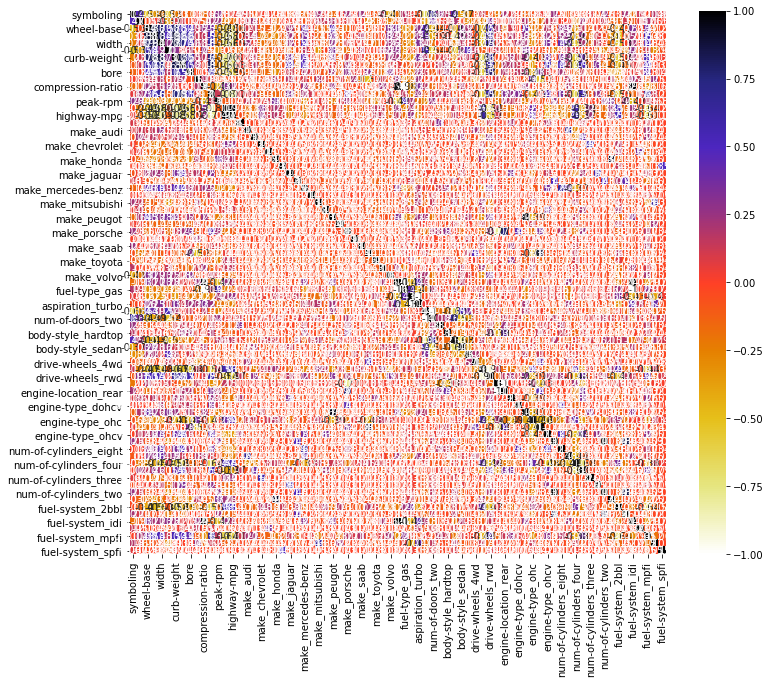

In [17]:
plt.figure(figsize=(12,10))
corr = x.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [18]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [19]:
corrl=correlation(x,0.7)
len(set(corrl))

20

In [20]:
corrl

{'aspiration_turbo',
 'city-mpg',
 'curb-weight',
 'drive-wheels_rwd',
 'engine-location_front',
 'engine-location_rear',
 'engine-size',
 'engine-type_l',
 'engine-type_ohcf',
 'fuel-system_1bbl',
 'fuel-system_4bbl',
 'fuel-system_idi',
 'fuel-type_diesel',
 'fuel-type_gas',
 'highway-mpg',
 'horsepower',
 'length',
 'num-of-cylinders_two',
 'num-of-doors_two',
 'width'}

In [23]:
x.drop(corrl,axis=1,inplace=True)

In [24]:
x

,symboling,normalized-losses,wheel-base,height,bore,stroke,compression-ratio,peak-rpm,make_alfa-romero,make_audi,...,num-of-cylinders_five,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,122.0,88.6,48.8,3.47,2.68,9.0,5000.0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,1,122.0,94.5,52.4,2.68,3.47,9.0,5000.0,1,0,...,0,0,1,0,0,0,0,1,0,0
2,2,164.0,99.8,54.3,3.19,3.40,10.0,5500.0,0,1,...,0,1,0,0,0,0,0,1,0,0
3,2,164.0,99.4,54.3,3.19,3.40,8.0,5500.0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,2,122.0,99.8,53.1,3.19,3.40,8.5,5500.0,0,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95.0,109.1,55.5,3.78,3.15,9.5,5400.0,0,0,...,0,1,0,0,0,0,0,1,0,0
200,-1,95.0,109.1,55.5,3.78,3.15,8.7,5300.0,0,0,...,0,1,0,0,0,0,0,1,0,0
201,-1,95.0,109.1,55.5,3.58,2.87,8.8,5500.0,0,0,...,0,0,1,0,0,0,0,1,0,0
202,-1,95.0,109.1,55.5,3.01,3.40,23.0,4800.0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression  
regressor= LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression()

In [27]:
y_pred=regressor.predict(x_test)

In [28]:
print(regressor.score(x_train, y_train))  
print(regressor.score(x_test, y_test))  

0.943205003288675
0.8677078875890327


In [29]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8677078875890327